In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
%load_ext autoreload
%aimport networks
from networks import BAGraph
%aimport log_bin
# helper functions
%aimport utils
font_size = 20
%autoreload 1

## networkx implementation vs mine

In [3]:
m, N = 4, 10**5

In [34]:
g0 = nx.barabasi_albert_graph(N, m, seed=20)

In [35]:
g1 = BAGraph(m, N, seed=20)

In [36]:
g0_degrees = pd.DataFrame(g0.degree(), index=['g0']).T
g1_degrees = pd.DataFrame(g1.degree(), index=['g1']).T
degrees_df = pd.concat([g0_degrees, g1_degrees], axis=1)

In [38]:
# with the same random seed, both should give exactly the same degree distribution
g0_degrees.equals(g1_degrees)

True

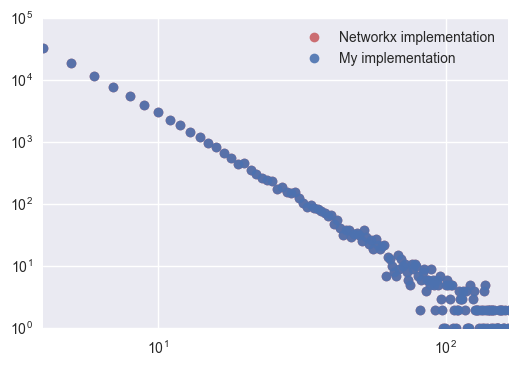

In [39]:
# plot to check
current_palette = sns.color_palette()
labels = {'g0': "Networkx implementation", "g1": "My implementation"}
for col in degrees_df:
    if col == 'g0':
        alpha = 0.8
        color = current_palette[2]
    else:
        alpha = 0.9
        color = current_palette[0]
    degrees_df[col].value_counts().plot(marker='o', linestyle="None", loglog=True, label=labels[col], alpha=alpha, color=color)
plt.legend()

They align exactly. 